**Omar Mancilla Martínez**

# Proyecto 10: Modelo del volumen de nuevos pozos.

## Introducción:
Buscamos encontrar la mejor región para abrir un par de cientos de pozos petroleros nuevos entre quinientas opciones. a través de un modelo de regresión lineal que prediga los beneficiós, y tras ello generar un reporte del estimado de ganancias.




In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler



### Objetivos:
Los objetivos de este notebook son:

- Cargar y preprocesar los datos exploración geológica de las tres regiones.
    - Escalar caracteristicas y codificar en caso de ser necesario.
- Entrenar modelos de regresión lineal para las tres regiones:
    - Analizar las posibles ganancias de los pozos.
    - Comparar las ganancias entre las tres regiones.
    - Determinar la región de mayor interes para invertir.
- Generar un informe de riesgos y ganancias por región
    

### Diccionario de datos:
- Caracteristicas:
    - *id*: identificador único de pozo de petróleo
    - *f0, f1, f2*: tres características de los puntos, sin significado concreto pero con relevancia para el proyecto.
   
- Objetivo:
    - *product*: volumen de reservas en el pozo de petróleo (miles de barriles).


Los datos estan divididos en tres archivos:
- *geo_data_0.csv*
- *geo_data_1.csv*
- *geo_data_2.csv*

Donde cada archivo representa una región diferente.

### Carga de datos y exploración inicial:
Exploraremos los tres conjuntos de datos con ayuda de una función personalizada.

In [2]:
def exploracion_inicial(data):
    print(f"Exploración inicial del dataframe, \nDiez primeros elementos:")
    display(data.sample(10))
    print(f"Información del dataframe:")
    data.info()
    print(f"Descripción cuantitativa:")
    display(data.describe())
    print(f"Valores únicos:")
    display(data.nunique())

#### Data0

In [3]:
data0 = pd.read_csv('./data/geo_data_0.csv')
exploracion_inicial(data0)

Exploración inicial del dataframe, 
Diez primeros elementos:


,id,f0,f1,f2,product
920,XW6gb,-0.926368,0.128027,2.356430,160.520971
91838,XL5rM,1.065741,0.156944,1.830824,20.886763
85220,sg3Uy,0.179212,0.271513,-4.607216,73.110500
15686,EQsQ6,0.824203,0.754211,4.375545,48.270532
60898,SzXTx,-0.102008,0.341295,2.717420,110.949140
80876,scHYW,0.298949,0.836528,1.097777,128.355586
13631,hubjZ,0.611299,-0.305755,4.007679,120.444693
71125,dWLv4,0.408844,-0.332512,4.533001,97.757472
40586,PgQZk,0.825971,0.415299,2.274837,22.556922
24259,pfx3s,-0.867198,0.801625,3.183472,25.365776


Información del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Descripción cuantitativa:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Valores únicos:


id          99990
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

De Data0 notamos que:
- No tenemos datos nulos
- Todas las columnas son relevantes para el modelo, sean caracteristicas u objetivos.
- Las medianas y medias de las 4 columnas numericas son similares, podemos suponer distribución normal.
- Las caracteristicas y objetivo necesitan ser escaladas.
- Tenemos diez IDs repetidos.


#### Data1

In [4]:
data1 = pd.read_csv('./data/geo_data_1.csv')
exploracion_inicial(data1)

Exploración inicial del dataframe, 
Diez primeros elementos:


,id,f0,f1,f2,product
81918,EZjIF,14.265509,-7.360836,3.000606,80.859783
91869,ZwjXB,1.064206,-12.147353,1.996310,57.085625
17776,GWttU,13.941932,-7.286749,1.002810,26.953261
72439,NcfUm,2.379061,-5.858004,2.005285,57.085625
83245,84oIG,-6.703069,-3.867452,2.002372,57.085625
87998,xVNYe,9.682243,-4.525772,4.999516,134.766305
48192,NgBbV,7.166648,-6.665187,4.999870,134.766305
4800,CAgYS,-11.826254,-6.786775,5.002201,137.945408
58330,WVuav,2.396913,-8.901273,-0.010665,0.000000
59538,rOHiq,4.049021,3.711450,3.992507,107.813044


Información del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Descripción cuantitativa:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


Valores únicos:


id          99996
f0         100000
f1         100000
f2         100000
product        12
dtype: int64

De Data1 notamos que:
- No tenemos datos nulos
- Todas las columnas son relevantes para el modelo, sean caracteristicas u objetivos.
- Las medianas y medias de las 2 primeras columnas numericas son similares, podemos suponer distribución normal.
- *F2* y *product* tienen su media y mediana suficientemente diferentes para requerir exploración adicional.
- Las caracteristicas y objetivo necesitan ser escaladas.
- tenemos 4 ids repetidos y pocos valores unicos de cantidad de barriles.


#### Data2

In [5]:
data2 = pd.read_csv('./data/geo_data_2.csv')
exploracion_inicial(data2)

Exploración inicial del dataframe, 
Diez primeros elementos:


,id,f0,f1,f2,product
74445,kPK9E,-0.454581,1.604424,-0.120364,33.839954
46135,B54wI,0.200980,-1.056607,4.616416,126.375424
86403,1ZJ3q,-0.451209,2.126291,2.123196,70.804330
86232,weBje,-1.107263,-1.148177,6.043961,24.659960
65045,xPPFW,-0.143352,-1.372640,-4.047985,40.510882
17910,YikAS,-0.297967,-0.325741,4.736993,31.617130
62100,HwyxM,-1.380562,1.599532,5.520798,112.486450
19565,GA7i1,-1.442062,1.378344,3.753456,7.848929
8564,pL9Jj,-2.896548,-0.757484,-0.963811,119.001232
44095,SRqp4,0.804453,0.670527,6.330853,126.677654


Información del dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
Descripción cuantitativa:


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Valores únicos:


id          99996
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

De Data2 notamos que:
- No tenemos datos nulos
- Todas las columnas son relevantes para el modelo, sean caracteristicas u objetivos.
- Las medianas y medias de las 2 ultimas columnas numericas (*F2* y *product*) son similares, podemos suponer distribución normal.
- *F0* y *F1* tienen su media y mediana suficientemente diferentes para requerir exploración adicional.
- Las caracteristicas y objetivo necesitan ser escaladas.

## Pre-Procesamiento de Datos:
Procedemos a eliminar los duplicados y datos nulos de todos los dataframes al igual que los *ids* duplicados, que representan menos del 1% de los datos; posteriormente dividiremos los datos en entrenamiento y validación, luego, para evitar el *data leakeage* escalaremos los datos de entrenamiento y con las metricas de dicho escalamiento normalizaremos los datos de validación; finalmente separaremos las caracteristicas del objetivo.


### Datos nulos y duplicados:
Corroboraremos que no haya datos nulos y eliminaremos cualquier duplicado.


In [6]:
def data_preprocessing(data):
    print("Datos nulos:")
    print("habia ",data[data.isnull().any(axis=1)].shape[0]," datos nulos")
    display(data[data.isnull().any(axis=1)])

    print("Datos duplicados:")
    print("habia ",data.duplicated().sum()," observaciones duplicadas")
    display(data[data.duplicated()])
    
    print("hay ",data.id.nunique()," ids únicos")

    data = data.drop_duplicates()
    data = data.dropna()
    data = data.drop_duplicates(subset='id')
    return data

In [7]:
print("Data0:")
data0=data_preprocessing(data0)
print("Data1:")
data1=data_preprocessing(data1)
print("Data2:")
data2=data_preprocessing(data2)

Data0:
Datos nulos:
habia  0  datos nulos


,id,f0,f1,f2,product


Datos duplicados:
habia  0  observaciones duplicadas


,id,f0,f1,f2,product


hay  99990  ids únicos
Data1:
Datos nulos:
habia  0  datos nulos


,id,f0,f1,f2,product


Datos duplicados:
habia  0  observaciones duplicadas


,id,f0,f1,f2,product


hay  99996  ids únicos
Data2:
Datos nulos:
habia  0  datos nulos


,id,f0,f1,f2,product


Datos duplicados:
habia  0  observaciones duplicadas


,id,f0,f1,f2,product


hay  99996  ids únicos


Limpiamos los datos al:
- Borrar duplicados
- Borrar datos vacios
- Borrar entradas con id's repetidas; esto considerando que son menos del 1% de datos totales.

### Remover Outliers

In [8]:
def remove_outliers(data, columns, threshold=3):
    for column in columns:
        mean = data[column].mean()
        std = data[column].std()
        data = data[(data[column] >= mean - threshold * std) & (data[column] <= mean + threshold * std)]
    return data

columns = ["f0", "f1", "f2", "product"]


In [9]:
data0 = remove_outliers(data0, columns)
data1 = remove_outliers(data1, columns)
data2 = remove_outliers(data2, columns)


### Separación en set de entrenamiento y de validación

Dividiremos los tres datasets, cada uno en dos subsets donde uno sera para entrenamiento y otro para validación; esto tendra una proporción de $75:25$ respectivamente.

In [10]:
def split_train_val(data, test_size=0.25, random_state=12345):
    data_train, data_val = train_test_split(data, test_size=test_size, random_state=random_state)
    return data_train, data_val



In [11]:
data_train0, data_val0 = split_train_val(data0)
data_train1, data_val1 = split_train_val(data1)
data_train2, data_val2 = split_train_val(data2)


### Escalado de caracteristicas

Escalaremos las caracteristicas en los sets de entrenamiento y usaremos las mismas metricas para escalar los sets de validación, esto para evitar el data leakeage.

In [12]:
numeric=["f0","f1","f2"]

def data_scaling(data_train, data_val):
    scaler = StandardScaler()
    scaler.fit(data_train[numeric])
    data_train[numeric]=scaler.transform(data_train[numeric])
    data_val[numeric]=scaler.transform(data_val[numeric])
    return data_train, data_val


In [13]:
data_train_scaled0, data_val_scaled0 = data_scaling(data_train0, data_val0)
data_train_scaled1, data_val_scaled1 = data_scaling(data_train1, data_val1)
data_train_scaled2, data_val_scaled2 = data_scaling(data_train2, data_val2)

### Separación de caracteristicas y objetivos:
Dividiremos los tres datasets, cada uno en dos subsets, uno contendra las caracteristicas (*F0, F1, F2*) y el otro el objetivo (*product*).

In [14]:
def data_separation(data):
    features=data.drop(["product","id"],axis=1)
    target=data["product"]
    return features,target


In [15]:
features_train0,target_train0=data_separation(data_train_scaled0)
features_val0,target_val0=data_separation(data_val_scaled0)

features_train1,target_train1=data_separation(data_train_scaled1)
features_val1,target_val1=data_separation(data_val_scaled1)

features_train2,target_train2=data_separation(data_train_scaled2)
features_val2,target_val2=data_separation(data_val_scaled2)


## Analisis de los datos
Generaremos un modelo de regresión logistica con los datos de data0, a cada paso se generara una función que posteriormente facilitara la creación de modelos para data1 y data2.

#### Primer modelo de **Regresión logistica**
Generaremos un modelo con los datos de data0, guardaremos las predicciones y las analizaremos en contraste con los resultados reales, posteriormente obtendremos un modelo para data1 y data2.

### Regresión de Data0.

In [16]:
def logistic_model(features_train, target_train, features_val, target_val):
    model_logistic = LinearRegression()  # inicializa el constructor de modelos
    model_logistic.fit(features_train, target_train)  # entrena el modelo en el conjunto de entrenamiento

    predictions_valid = model_logistic.predict(features_val)  # obtén las predicciones del modelo en el conjunto de validación
    predictions_train=model_logistic.predict(features_train)

    R2_train=r2_score(target_train, predictions_train)
    R2_val=r2_score(target_val, predictions_valid)

    #print("R2 en entrenamiento:", R2_train)
    #print("Raiz del error cuadratico medio en el conjunto de entrenamiento:", (mean_squared_error(target_train, predictions_train)**0.5))
    print("R2 en validación:", R2_val)
    print("Raiz del error cuadratico medio en el conjunto de validación:", (mean_squared_error(target_val, predictions_valid)**0.5))
    
    print("\nEl volumen medio de reserservas predicho es:",predictions_valid.mean(),"\nMientras que el volumen medio de reservas real es:",target_val.mean(),
    "\nEl error absoluto es:",abs(predictions_valid.mean()-target_val.mean()),
    "\nEl error relativo es:",abs(predictions_valid.mean()-target_val.mean())/target_val.mean()*100,"% \n")

    return model_logistic, predictions_valid



In [17]:
model_logistic0, predictions_val0 = logistic_model(features_train0, target_train0, features_val0, target_val0)
data_predict0=data_val0.copy()
data_predict0["predictions"]=predictions_val0


R2 en validación: 0.2725959438742531
Raiz del error cuadratico medio en el conjunto de validación: 37.64389454717906

El volumen medio de reserservas predicho es: 92.51687354855495 
Mientras que el volumen medio de reservas real es: 92.22875039016667 
El error absoluto es: 0.28812315838828795 
El error relativo es: 0.31240058785292546 % 



#### Analizamos los resultados del modelo de data0:
Encontramos dos resultados aparemente contrarios, por un lado nuestro modelo tiene un *error cuadratico medio* de $37.6$, el cual es relativamente alto, mientras que el *error en la predicción del volumen medio* es menor al $0.2\%$.

Parece implicar que el modelo no es fiable para predecir los valores particulares de cada pozo, sin embargo puede ser util para describir la generalidad de una región, en este caso la región de data0; lo cual es adecuado para nuestros objetivos. 

Veamos como se comportar con las demas regiones.

### Regresión de Data1

In [18]:
model_logistic1, predictions_val1 = logistic_model(features_train1, target_train1, features_val1, target_val1)
data_predict1=data_val1.copy()
data_predict1["predictions"]=predictions_val1

R2 en validación: 0.9996257318124872
Raiz del error cuadratico medio en el conjunto de validación: 0.8902029677592128

El volumen medio de reserservas predicho es: 68.95466966661901 
Mientras que el volumen medio de reservas real es: 68.95331112071955 
El error absoluto es: 0.0013585458994640476 
El error relativo es: 0.0019702402645836435 % 



### Regresión de Data2

In [19]:
model_logistic2, predictions_val2 = logistic_model(features_train2, target_train2, features_val2, target_val2)
data_predict2=data_val2.copy()
data_predict2["predictions"]=predictions_val2

R2 en validación: 0.19418675198650315
Raiz del error cuadratico medio en el conjunto de validación: 40.28289858224426

El volumen medio de reserservas predicho es: 94.91020960251845 
Mientras que el volumen medio de reservas real es: 94.57403033810539 
El error absoluto es: 0.3361792644130617 
El error relativo es: 0.3554667842865629 % 



### Analisis de los modelos

Repasamos las metricas y predicciones de los modelos:

- Para Data0:
    - $R2_0=0.27$
    - $RSME_0=37.58$
    - $Vol_0=92.69 \pm 0.63$

- Para Data1:
    - $R2_1=0.99$
    - $RSME_1=0.89$
    - $Vol_1=68.96 \pm 0.003$

- Para Data2:
    - $R2_2=0.19$
    - $RSME_2=40.21$
    - $Vol_2=94.65 \pm 0.63$

Pese a que el modelo de data0 tiene un $R2$ bajo, el volumen medio predicho es muy similar al real, esto se repite con data1 y data2, pese a que los valores de $R2$ varian significativamente entre las regiones.

Ahora vizualizamos las predicciones en forma de histograma, donde los 200 pozos con mas volumen son graficados en negro.

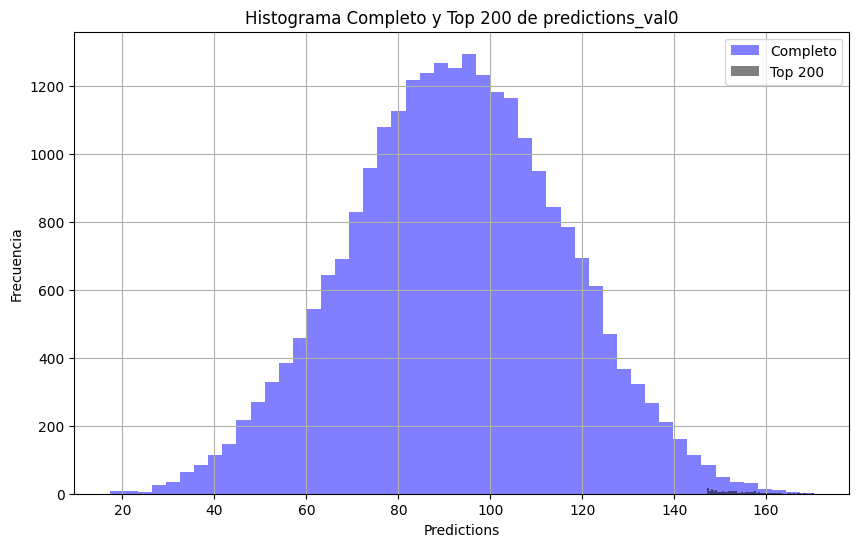

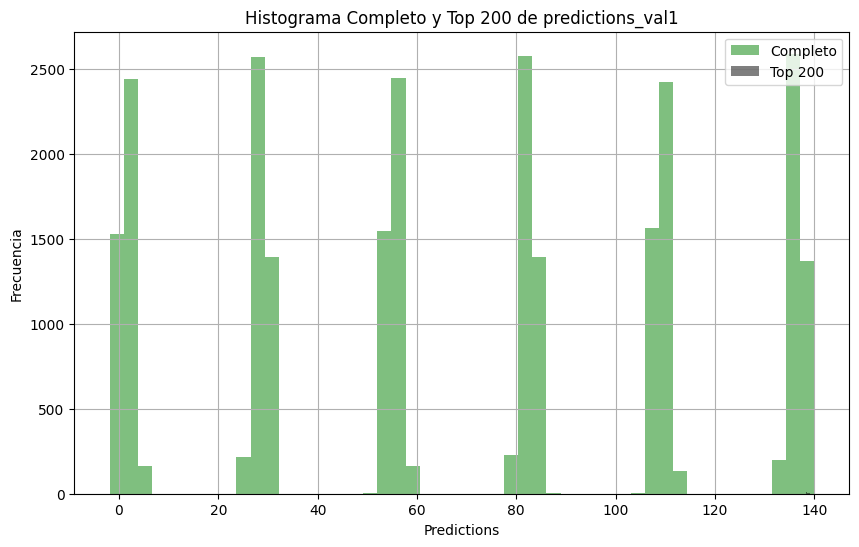

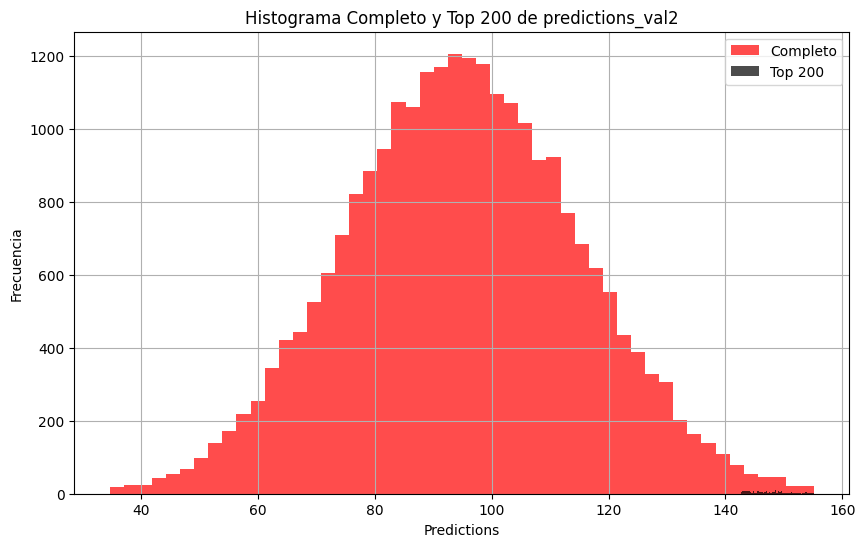

In [20]:
# Histograma completo de predictions_val0
plt.figure(figsize=(10, 6))
plt.hist(predictions_val0, bins=50, color='blue', alpha=0.5, label='Completo')
plt.hist(sorted(predictions_val0, reverse=True)[:200], bins=50, color='black', alpha=0.5, label='Top 200')
plt.title('Histograma Completo y Top 200 de predictions_val0')
plt.xlabel('Predictions')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

# Histograma completo de predictions_val1
plt.figure(figsize=(10, 6))
plt.hist(predictions_val1, bins=50, color='green', alpha=0.5, label='Completo')
plt.hist(sorted(predictions_val1, reverse=True)[:200], bins=50, color='black', alpha=0.5, label='Top 200')
plt.title('Histograma Completo y Top 200 de predictions_val1')
plt.xlabel('Predictions')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

# Histograma completo de predictions_val2
plt.figure(figsize=(10, 6))
plt.hist(predictions_val2, bins=50, color='red', alpha=0.7, label='Completo')
plt.hist(sorted(predictions_val2, reverse=True)[:200], bins=50, color='black', alpha=0.7, label='Top 200')
plt.title('Histograma Completo y Top 200 de predictions_val2')
plt.xlabel('Predictions')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()


 Podemos notar que pese a que el valor medio predicho de cada zona es menor que el requerido, existen muchos pozos con un volumen mayor al requerido permitiendo la rentabilidad.

### Analisis de ganancias
Primero obtendremos los valores necesarios para los cálculos:
- El presupuesto es de 100 millones de dolares.
- El numero de pozos a abrir es de 200.
- El volumen medio de reservas en cada región es:
    - Data0: 92.69
    - Data1: 68.96
    - Data2: 94.65
- El ingreso por unidad de producto, mil barrilesm es de 4500 dólares

- la cantidad minima de reservas para evitar pérdidas es de 500,000 dolares por pozo.
    - esto es equivalente a 111.1 unidades.
- Ninguna región tiene un volumen medio igual o mayor a 111.1 unidades, por lo cual pareciera que ninguna región es rentable, sin embargo  como se vio en el histograma, todas las regiones poseen mas de 200 pozos con un volumen mayor a 111.1 unidades, permitiendo la rentabilidad.


In [21]:
ingreso=4500
num_pozos=200
costo=500000

In [22]:
def ganancias(data,ingreso, num_pozos,costo, imprimir=True):
    data = data.sort_values(by="product", ascending=False)
    top = data.head(num_pozos)
    ingresos=top["product"].sum()*ingreso
    beneficio_bruto=ingresos-(costo*num_pozos)
    if imprimir:
        print("La cantidad de ingresos generada por esta región será:",ingresos,
        "\nPor lo cual, el beneficio bruto será de:",beneficio_bruto, "dolares")


    return beneficio_bruto

In [23]:
Beneficio_bruto0=ganancias(data_predict0,ingreso, num_pozos,costo)

La cantidad de ingresos generada por esta región será: 164735892.15034232 
Por lo cual, el beneficio bruto será de: 64735892.150342315 dolares


In [24]:
Beneficio_bruto1=ganancias(data_predict1,ingreso, num_pozos,costo)


La cantidad de ingresos generada por esta región será: 124150866.96681511 
Por lo cual, el beneficio bruto será de: 24150866.966815114 dolares


In [25]:
Beneficio_bruto2=ganancias(data_predict2,ingreso, num_pozos,costo)

La cantidad de ingresos generada por esta región será: 169223006.14967573 
Por lo cual, el beneficio bruto será de: 69223006.14967573 dolares


In [26]:
beneficios = [Beneficio_bruto0, Beneficio_bruto1, Beneficio_bruto2]
display(pd.DataFrame({'Region': [0, 1, 2], 'Beneficio Bruto': beneficios}).sort_values(by="Beneficio Bruto", ascending=False))


,Region,Beneficio Bruto
2,2,6.922301e+07
0,0,6.473589e+07
1,1,2.415087e+07


Gracias a estos modelos, hemos podido determinar que las tres regiones son rentables, sin embargo, la región que posee mayor beneficio bruto es **data2**, dando el mayor beneficio bruto de **70,588,272 dolares.**


## Riesgos y Ganancias:

Procederemos a calcular el riesgo de cada región, esto mediante bootstraping.


### Distribución de Benefició bruto
Calcularemos a traves de bootstraping la distribución de beneficiós brutos para cada región a través de la siguiente funcíon:

In [27]:
state = np.random.RandomState(12345)

def bootstrap(data, ingreso, num_pozos, costo, n_samples=1000):
    beneficios = []
    for n in range(n_samples):
        sample = data.sample(frac=1, replace=True, random_state=state)
        beneficio_bruto = ganancias(sample, ingreso, num_pozos, costo, imprimir=False)
        beneficios.append(beneficio_bruto)
    return pd.DataFrame(beneficios)



#### Región 0:

In [28]:
# Calcular la distribución de los beneficios para la región 0
bootstrap_beneficios0 = bootstrap(data_predict0, ingreso, num_pozos, costo)

Distribución de beneficios para la región 0:


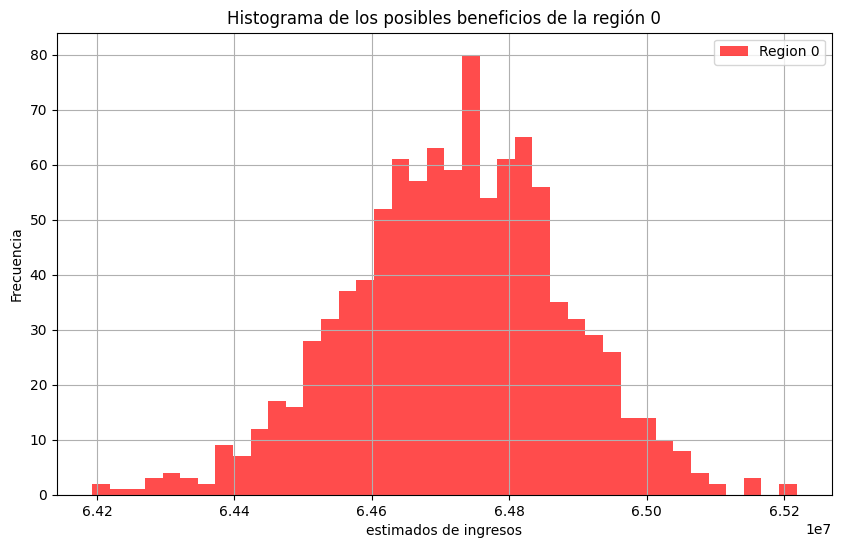

,0
count,1.000000e+03
mean,6.472227e+07
std,1.569248e+05
min,6.419296e+07
25%,6.462193e+07
50%,6.472886e+07
75%,6.482695e+07
max,6.521812e+07


,0
921,6.472973e+07
424,6.481443e+07
451,6.451346e+07
705,6.478998e+07
330,6.473298e+07


In [29]:
print("Distribución de beneficios para la región 0:")

plt.figure(figsize=(10, 6))
plt.hist(bootstrap_beneficios0, bins=40, color='red', alpha=0.7, label='Region 0')
plt.title('Histograma de los posibles beneficios de la región 0')
plt.xlabel('estimados de ingresos')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

display(bootstrap_beneficios0.describe())
display(bootstrap_beneficios0.sample(5))


#### Región 1:

In [30]:
# Calcular la distribución de los beneficios para la región 1
bootstrap_beneficios1 = bootstrap(data_predict1, ingreso, num_pozos, costo)

Distribución de beneficios para la región 1:


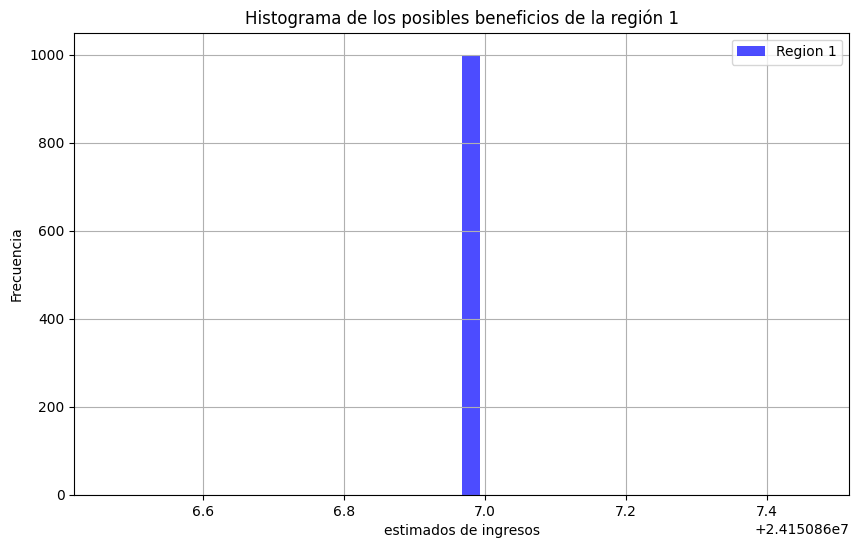

,0
count,1.000000e+03
mean,2.415087e+07
std,3.727154e-09
min,2.415087e+07
25%,2.415087e+07
50%,2.415087e+07
75%,2.415087e+07
max,2.415087e+07


,0
827,2.415087e+07
800,2.415087e+07
559,2.415087e+07
716,2.415087e+07
740,2.415087e+07


In [31]:

# Mostrar los resultados
print("Distribución de beneficios para la región 1:")

plt.figure(figsize=(10, 6))
plt.hist(bootstrap_beneficios1, bins=40, color='Blue', alpha=0.7, label='Region 1')
plt.title('Histograma de los posibles beneficios de la región 1')
plt.xlabel('estimados de ingresos')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

display(bootstrap_beneficios1.describe())
display(bootstrap_beneficios1.sample(5))

#### Región 2:

In [32]:

# Calcular la distribución de los beneficios para la región 2
bootstrap_beneficios2 = bootstrap(data_predict2, ingreso, num_pozos, costo)

Distribución de beneficios para la región 2:


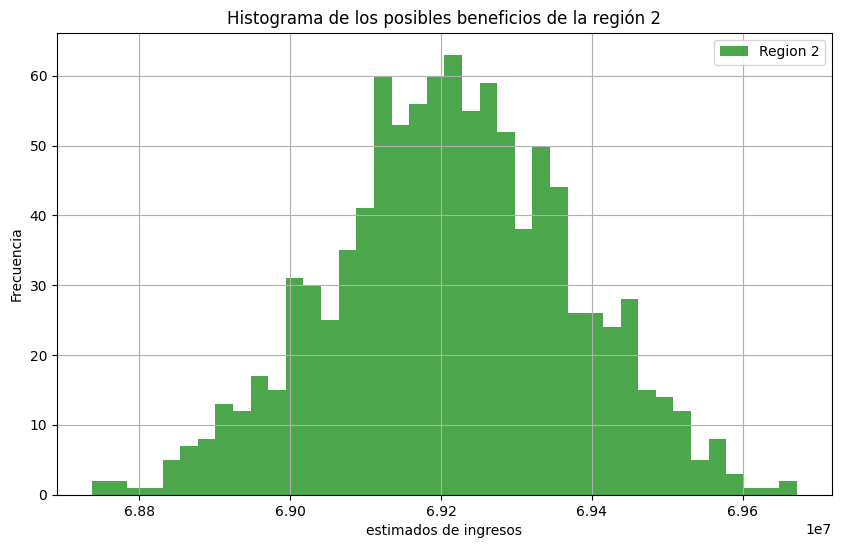

,0
count,1.000000e+03
mean,6.921489e+07
std,1.590495e+05
min,6.873778e+07
25%,6.911284e+07
50%,6.921134e+07
75%,6.932442e+07
max,6.967134e+07


,0
529,6.934343e+07
311,6.947239e+07
425,6.917193e+07
911,6.942254e+07
181,6.914839e+07


In [33]:

# Mostrar los resultados
print("Distribución de beneficios para la región 2:")

plt.figure(figsize=(10, 6))
plt.hist(bootstrap_beneficios2, bins=40, color='Green', alpha=0.7, label='Region 2')
plt.title('Histograma de los posibles beneficios de la región 2')
plt.xlabel('estimados de ingresos')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

display(bootstrap_beneficios2.describe())
display(bootstrap_beneficios2.sample(5))

### Calculo de beneficios promedio, el intervalo de confianza y el riesgo de perdidas:

Procederemos a calcular multiples metricas relevantes para región con la siguiente función:

In [34]:
def calcular_beneficios(bootstrap_beneficios):
    beneficio_promedio = bootstrap_beneficios[0].mean()

    intervalo_confianza = np.percentile(bootstrap_beneficios, [2.5, 97.5])

    riesgo_perdidas = (bootstrap_beneficios <= 0).mean() * 100

    # Mostrar los resultados
    print(f"Beneficio promedio: {beneficio_promedio}")
    print(f"Intervalo de confianza del 95%: {intervalo_confianza}")
    print(f"Riesgo de perdidas: {riesgo_perdidas} %")

    return beneficio_promedio, intervalo_confianza[0], intervalo_confianza[1], riesgo_perdidas



##### Región 0:

In [35]:

beneficio_promedio0, intervalo_confianza_min0, intervalo_confianza_max0, riesgo_perdidas0=calcular_beneficios(bootstrap_beneficios0)


Beneficio promedio: 64722266.20010089
Intervalo de confianza del 95%: [64398199.08238062 65016471.58115491]
Riesgo de perdidas: 0    0.0
dtype: float64 %


##### Región 1:

In [36]:
beneficio_promedio1, intervalo_confianza_min1, intervalo_confianza_max1, riesgo_perdidas1=calcular_beneficios(bootstrap_beneficios1)


Beneficio promedio: 24150866.966815118
Intervalo de confianza del 95%: [24150866.96681511 24150866.96681511]
Riesgo de perdidas: 0    0.0
dtype: float64 %


##### Región 2:

In [37]:

beneficio_promedio2, intervalo_confianza_min2, intervalo_confianza_max2, riesgo_perdidas2=calcular_beneficios(bootstrap_beneficios2)


Beneficio promedio: 69214892.81365584
Intervalo de confianza del 95%: [68896570.88997939 69521970.58302256]
Riesgo de perdidas: 0    0.0
dtype: float64 %


### Analisis y observaciones:
Podemos resumir la información anterior de la siguiente forma:


In [69]:
df_beneficios = pd.DataFrame({
    'Region': ['Región 0', 'Región 1', 'Región 2'],
    'Beneficio Promedio': [beneficio_promedio0, beneficio_promedio1, beneficio_promedio2],
    'Intervalo inferior de Confianza': [intervalo_confianza_min0, intervalo_confianza_min1, intervalo_confianza_min2],
    'Intervalo superior de Confianza': [intervalo_confianza_max0, intervalo_confianza_max1, intervalo_confianza_max2],
    'Riesgo de Perdidas': [riesgo_perdidas0, riesgo_perdidas1, riesgo_perdidas2]
})

display(df_beneficios)

,Region,Beneficio Promedio,Intervalo inferior de Confianza,Intervalo superior de Confianza,Riesgo de Perdidas
0,Región 0,6.472227e+07,6.439820e+07,6.501647e+07,0 0.0 dtype: float64
1,Región 1,2.415087e+07,2.415087e+07,2.415087e+07,0 0.0 dtype: float64
2,Región 2,6.921489e+07,6.889657e+07,6.952197e+07,0 0.0 dtype: float64


Y verla graficamente:

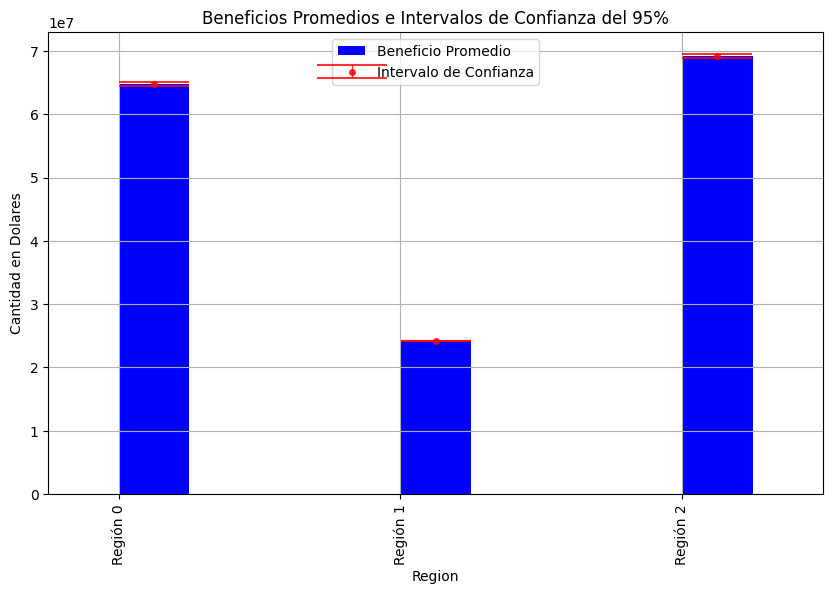

In [71]:
# Graficamos
fig, ax = plt.subplots(figsize=(10, 6))

bars = df_beneficios.plot(x='Region', y='Beneficio Promedio', kind='bar', ax=ax, position=0, width=0.25, color='blue', label='Beneficio Promedio')

for bar, yerr_min, yerr_max in zip(bars.patches, 
                                   abs(df_beneficios['Intervalo inferior de Confianza']-df_beneficios['Beneficio Promedio']), 
                                   abs(df_beneficios['Intervalo superior de Confianza']-df_beneficios['Beneficio Promedio'])):
    ax.errorbar(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                yerr=[[yerr_min], [yerr_max]], 
                fmt='o', color='red', label='Intervalo de Confianza' if bar == bars.patches[0] else "", 
                capsize=25, capthick=1.5, elinewidth=1, markersize=4,alpha=0.8)

plt.title('Beneficios Promedios e Intervalos de Confianza del 95%')
plt.ylabel('Cantidad en Dolares')
plt.grid()
plt.legend()
plt.show()


Tanto del grafico como la tabla, podemos ver que´:
- ninguna región representa un riesgo de perdida
- la **región 2** es aquella con mejor beneficio promedio
- la **región 2** es aquella con mejor intervalo de confianza
- Se propone a la **región 2** como el lugar para abrir los pozos.

De esta forma comparamos con la propuesta anterior, donde se coincide que la **región 2** es la adecuada para abrir los pozos.